In [1]:
# Building On Example from https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/
# Building On Example from https://www.tensorflow.org/tutorials/images/cnn
# Building On Example from https://www.guru99.com/rnn-tutorial.html
# Building On Example from https://machinelearningmastery.com/prepare-univariate-time-series-data-long-short-term-memory-networks/
# Building On Example from TensorFlow Documentation
# For a multi-feature example, see: https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/23_Time-Series-Prediction.ipynb


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sklearn.datasets
import sklearn.model_selection

First, let's set up a simple dataset. We know digits already, and it's a good, usable set of images, so let's start there.

In [2]:
images = sklearn.datasets.load_digits()
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(images.data, images.target, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train, y_test)

(1437, 64) (360, 64) [6 0 0 ... 2 7 1] [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 9 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 5 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5]


Next, let's make a Feed-Forward Neural Network.

In [3]:
FFmodel = keras.Sequential()
FFmodel.add(layers.Dense(10, input_shape = (64,), activation='relu'))
FFmodel.add(layers.Dense(10, activation='softmax'))

FFmodel.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
FFmodel.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
45/45 [==============================] - 1s 5ms/step - loss: 2.5591 - accuracy: 0.1754
Epoch 2/10
45/45 [==============================] - 0s 2ms/step - loss: 1.9235 - accuracy: 0.3076
Epoch 3/10
45/45 [==============================] - 0s 2ms/step - loss: 1.7272 - accuracy: 0.4001
Epoch 4/10
45/45 [==============================] - 0s 2ms/step - loss: 1.5129 - accuracy: 0.4704
Epoch 5/10
45/45 [==============================] - 0s 2ms/step - loss: 1.2904 - accuracy: 0.5532
Epoch 6/10
45/45 [==============================] - 0s 2ms/step - loss: 1.0855 - accuracy: 0.6423
Epoch 7/10
45/45 [==============================] - 0s 2ms/step - loss: 0.8873 - accuracy: 0.7056
Epoch 8/10
45/45 [==============================] - 0s 2ms/step - loss: 0.7095 - accuracy: 0.7578
Epoch 9/10
45/45 [==============================] - 0s 1ms/step - loss: 0.5897 - accuracy: 0.8045
Epoch 10/10
45/45 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.8386


"Sequential" is the object that allows us to add layers in sequence (hence the name) to build our model piece by piece.

"Dense" is a fully connected layer of nodes. I set how many nodes I want in the layer and the activation function. In the starting layer, I also have to specify the size and shape of my input.

We compile a model to set up the metrics we will use in the fitting process as well as any evaluation metrics.

We fit on the training set.

We evaluate on the test set.

In [4]:
loss, acc = FFmodel.evaluate(X_test, y_test)
print('Test Accuracy FFNN ' + str(acc))

12/12 [==============================] - 0s 2ms/step - loss: 0.5656 - accuracy: 0.8028
Test Accuracy FFNN 0.8027777671813965


Now, let's try a Convolutional Neural Net!

In [5]:
X_train_square = tf.reshape(X_train, [1437, 8, 8])
X_test_square = tf.reshape(X_test, [360, 8, 8])

Cmodel = keras.Sequential()
Cmodel.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(8, 8, 1)))
Cmodel.add(layers.MaxPooling2D((2, 2)))
Cmodel.add(layers.Flatten())
Cmodel.add(layers.Dense(10, input_shape = (64,), activation='relu'))
Cmodel.add(layers.Dense(10, activation='softmax'))

Cmodel.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
Cmodel.fit(X_train_square, y_train, epochs=150, batch_size=32)


Epoch 1/150
45/45 [==============================] - 1s 4ms/step - loss: 2.1995 - accuracy: 0.1809
Epoch 2/150
45/45 [==============================] - 0s 3ms/step - loss: 1.7839 - accuracy: 0.3271
Epoch 3/150
45/45 [==============================] - 0s 3ms/step - loss: 1.3904 - accuracy: 0.4892
Epoch 4/150
45/45 [==============================] - 0s 3ms/step - loss: 1.0976 - accuracy: 0.6061
Epoch 5/150
45/45 [==============================] - 0s 3ms/step - loss: 0.8496 - accuracy: 0.7230
Epoch 6/150
45/45 [==============================] - 0s 3ms/step - loss: 0.6991 - accuracy: 0.7759
Epoch 7/150
45/45 [==============================] - 0s 4ms/step - loss: 0.5857 - accuracy: 0.8079
Epoch 8/150
45/45 [==============================] - 0s 3ms/step - loss: 0.4957 - accuracy: 0.8420
Epoch 9/150
45/45 [==============================] - 0s 4ms/step - loss: 0.4242 - accuracy: 0.8657
Epoch 10/150
45/45 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.8754
Epoch 11/

Here, we have to reshape the 64 features into our 8X8 matrix.

We use the same Sequential model, but we add Conv2D (that is, convolution layers that work on 2D data) and MaxPooling2D layers. I have to specify the size and shape of my convolution matrix and pooling matrix.

I "Flatten" the layers after my 2D processing in order for them to connect to a Dense layer.

In [6]:
loss, acc = Cmodel.evaluate(X_test_square, y_test)
print('Test Accuracy CNN ' + str(acc))

12/12 [==============================] - 0s 2ms/step - loss: 0.1095 - accuracy: 0.9861
Test Accuracy CNN 0.9861111044883728


Now, let's look at a Time-Series problem, and use an LSTM model to fit.

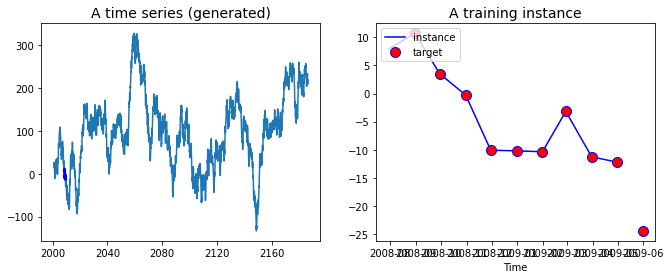

In [7]:
def create_ts(start = '2001', n = 2001, freq = 'M'):
    rng = pd.date_range(start=start, periods=n, freq=freq)
    ts = pd.Series(np.random.uniform(-18, 18, size=len(rng)), rng).cumsum()
    return ts

ts = create_ts(start = '2001', n = 2222)

# Left
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(ts.index, ts)
plt.plot(ts.index[90:100], ts[90:100], "b-", linewidth=3, label="A training instance")
plt.title("A time series (generated)", fontsize=14)

# Right
plt.subplot(122)
plt.title("A training instance", fontsize=14)
plt.plot(ts.index[90:100], ts[90:100], "b-", markersize=8, label="instance")
plt.plot(ts.index[91:101], ts[91:101], "bo", markersize=10, label="target", markerfacecolor='red')
plt.legend(loc="upper left")
plt.xlabel("Time")

plt.show()

In [8]:
series = np.array(ts)
n_windows = 20   
n_input =  1
n_output = 1
size_train = 2001

In [9]:
## Split data
train = series[:size_train]
test = series[size_train:]
print(train.shape, test.shape)

(2001,) (221,)


In [10]:
def create_batches(df, windows, input, output):
    ## Create X         
        x_data = df[:len(df)-1] # Select the data
        X_batches = x_data.reshape(-1, windows, input)  # Reshape the data 
    ## Create y
        y_data = df[n_output:len(df)]
        y_batches = y_data.reshape(-1, windows, output)
        return X_batches, y_batches

In [11]:
X_test, y_test = create_batches(df = test, windows = 20,input = 1, output = 1)
print(X_test.shape, y_test.shape)
print(test)
print(X_test)


(11, 20, 1) (11, 20, 1)
[143.48976569 153.58037055 153.82524345 159.36663727 168.03230162
 160.5154155  176.4413652  174.53731923 175.7842566  168.51391673
 181.74663228 199.5583944  209.57502105 207.12263146 215.5885673
 198.37413428 210.83859266 212.2460195  203.61190466 208.20015695
 224.53779493 211.75584803 215.5494587  232.76734526 237.91400085
 241.6133677  249.91702546 237.75799581 226.4206793  210.42256305
 208.47737078 208.29161317 215.62551874 216.87019792 231.81138012
 232.88996186 237.94775199 222.31944523 221.88693435 228.72910211
 217.94172658 225.37275123 214.66281298 205.98287115 222.90931256
 205.86643906 223.15582245 219.61798692 209.27884133 216.71466573
 226.81046625 214.20430683 199.67763823 196.27113062 202.0911886
 218.7832653  207.19886248 218.30930508 209.60657414 226.16082098
 234.52560133 239.23015057 238.07588732 245.76257118 229.53316947
 240.98218442 257.71746989 255.54794929 259.3204645  251.17097003
 238.3831608  237.86997312 245.9056261  235.36273612 2

In [12]:
X_batches, y_batches = create_batches(df = train,
                                      windows = n_windows,
                                      input = n_input,
                                      output = n_output)
print(X_batches.shape, y_batches.shape)

X_test, y_test = create_batches(df = test, windows = n_windows,input = n_input, output = n_output)
print(X_test.shape, y_test.shape)

(100, 20, 1) (100, 20, 1)
(11, 20, 1) (11, 20, 1)


In [13]:

model = keras.Sequential()

# Add a LSTM layer with internal units.
model.add(layers.LSTM(500, input_shape=(20,1), activation = 'ReLU'))

# Add a Dense layer for output.
model.add(layers.Dense(1, activation=None))

## 3. Loss + optimization
learning_rate = 0.001  


model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[
        tf.metrics.MeanSquaredError(),
    ]
)    


Epoch 1/50
4/4 [==============================] - 2s 133ms/step - loss: 7922.9595 - mean_squared_error: 7922.9595
Epoch 2/50
4/4 [==============================] - 1s 128ms/step - loss: 1106.0563 - mean_squared_error: 1106.0563
Epoch 3/50
4/4 [==============================] - 1s 146ms/step - loss: 2227.6016 - mean_squared_error: 2227.6016
Epoch 4/50
4/4 [==============================] - 1s 146ms/step - loss: 933.5176 - mean_squared_error: 933.5176
Epoch 5/50
4/4 [==============================] - 1s 142ms/step - loss: 816.7957 - mean_squared_error: 816.7957
Epoch 6/50
4/4 [==============================] - 1s 143ms/step - loss: 572.1492 - mean_squared_error: 572.1492
Epoch 7/50
4/4 [==============================] - 1s 144ms/step - loss: 647.7036 - mean_squared_error: 647.7036
Epoch 8/50
4/4 [==============================] - 1s 140ms/step - loss: 798.1359 - mean_squared_error: 798.1359
Epoch 9/50
4/4 [==============================] - 1s 131ms/step - loss: 445.5127 - mean_squared_er

<Figure size 432x288 with 0 Axes>

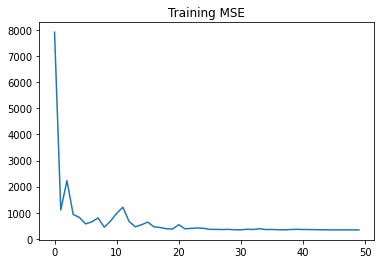

<Figure size 432x288 with 0 Axes>

In [14]:
history = model.fit(X_batches,y_batches, epochs=50)

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
mse = history.history['mean_squared_error']
#val_acc = history.history['val_acc']

# Get number of epochs
epochs = range(len(mse))

# Plot training and validation accuracy per epoch
plt.plot(epochs, mse)
plt.title('Training MSE')

plt.figure()